# Oil well site & profit predictor model

# Project description

I work at an oil company called OilyGiant and is tasked to find a suitable location for a new oil well.

To do so, we need to follow these steps:
1. Considering site parameters: oil quality and oil reserve volume,
1. Creating models to predict the reserve volume at the site,
1. Choosing a well with the highest estimated value,
1. Choosing sites within the region with the highest profit.

We are provided with more guidelines and information regarding the calculations:
1. We need to use linear regression models,
1. Conduct a study on 500 points in a region and choose the best 200 for profit calculations.
1. The budget to build 200 oil wells is 100 million USD.
1. One barrel of crude oil returns a revenue of 4.5 USD. One product unit (oil reserve volume of 1000 barrels) yields 4500 USD in revenues.
1. We need to keep only the regions with a risk of loss of less than 2.5%. Of all regions that fulfill the criteria, we need to take regions with the highest mean profit.

## Data description

We are provided with 3 datasets, each containing the geological exploration data of a site.

- `id`
- `f0`, `f1`, `f2`: site features
- `product`: site reserve volume (in 1000 barrels)

## Note
To get consistent results, we will use a random state of `12345` throughout this project.


# Loading libraries 

In [1]:
# For dataframe manipulation
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# scikit-learn
## Model
from sklearn.linear_model import LinearRegression

## Tools
from sklearn.model_selection import train_test_split
### For feature scaling
from sklearn.preprocessing import StandardScaler

## Metrics
from sklearn.metrics import mean_squared_error

# For number arrays
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets

In [2]:
# If run locally
try:
    data_0 = pd.read_csv('datasets/geo_data_0.csv')
    data_1 = pd.read_csv('datasets/geo_data_1.csv')
    data_2 = pd.read_csv('datasets/geo_data_2.csv')

# If run on the platform
except:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')

# Data preprocessing
## Checking datasets

In [3]:
# data_0
print(data_0.info())
print(data_0.describe())
data_0.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.3437

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
# data_1
print(data_1.info())
print(data_1.describe())
data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551      -8.267985       1.000021      26.953261
50%         1.153055      -4.813172       2.011479      57.085625
75%         8.621015      -1.332816       3.999904     107.813044
max        29.421755      18.7340

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [5]:
# data_2
print(data_2.info())
print(data_2.describe())
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.002023      -0.002081       2.495128      95.000000
std         1.732045       1.730417       3.473445      44.749921
min        -8.760004      -7.084020     -11.970335       0.000000
25%        -1.162288      -1.174820       0.130359      59.450441
50%         0.009424      -0.009482       2.484236      94.925613
75%         1.158535       1.163678       4.858794     130.595027
max         7.238262       7.8448

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


Each dataset consists of 10,000 rows. The features, `f0`, `f1`, and `f2` have values of varying range, which are correlated with how much oil (`product`) does each site produce. The `product` target itself have values ranging from `0` to somewhere below `200` with varying means and standard deviations in each set.

All sets have no missing values and are ready for further processes. `product` will be our target and the rest (except for `id`) will be the features.

## Splitting

According to the instructions, we have to split the sets into training and validation sets with a 75:25 ratio.

In [6]:
# Splitting data_0
train_0, val_0 = train_test_split(data_0, train_size=0.75, random_state=12345)
print('train_0 set shape:', train_0.shape)
print('val_0 set shape:', val_0.shape)
print()

# Splitting data_1
train_1, val_1 = train_test_split(data_1, train_size=0.75, random_state=12345)
print('train_1:', train_1.shape)
print('val_1 set shape:', val_1.shape)
print()

# Splitting data_2
train_2, val_2 = train_test_split(data_2, train_size=0.75, random_state=12345)
print('train_2:', train_2.shape)
print('val_2 set shape:', val_2.shape)

train_0 set shape: (75000, 5)
val_0 set shape: (25000, 5)

train_1: (75000, 5)
val_1 set shape: (25000, 5)

train_2: (75000, 5)
val_2 set shape: (25000, 5)


## Defining features and targets

We need the model to predict how many barrels of oil are present in a site. `product` contains exactly that information, so it will be our target. 

`f0`, `f1`, and `f2` are the factors that determine our target value, so they will be our features.

`id` values do not have anything to do with the target, so it will be dropped.

In [7]:
# Defining features for each set
train_0_features = train_0[['f0', 'f1', 'f2']]
train_1_features = train_1[['f0', 'f1', 'f2']]
train_2_features = train_2[['f0', 'f1', 'f2']]

val_0_features = val_0[['f0', 'f1', 'f2']]
val_1_features = val_1[['f0', 'f1', 'f2']]
val_2_features = val_2[['f0', 'f1', 'f2']]

# Defining the target for each set
train_0_target = train_0[['product']]
train_1_target = train_1[['product']]
train_2_target = train_2[['product']]

val_0_target = val_0[['product']]
val_1_target = val_1[['product']]
val_2_target = val_2[['product']]

## Feature scaling

The performance of regression models is affected by the difference in data values, especially when features are measured in different units. Simply put, regression models may see data with larger numbers as having more significance than those with smaller values. Scaling increases the efficiency of regression models by converting data values into a uniform scale.

Two of the most commonly used scaling methods are normalization and standardization. To know which one is more suitable for our data, we first need to find out whether our features follow normal/Gaussian distribution.

### Testing for normality

We can roughly estimate the data's normality by using histograms. If the histogram roughly shows the shape of a bell, it can be assumed that our data follows the normal distribution.

<Axes: ylabel='Count'>

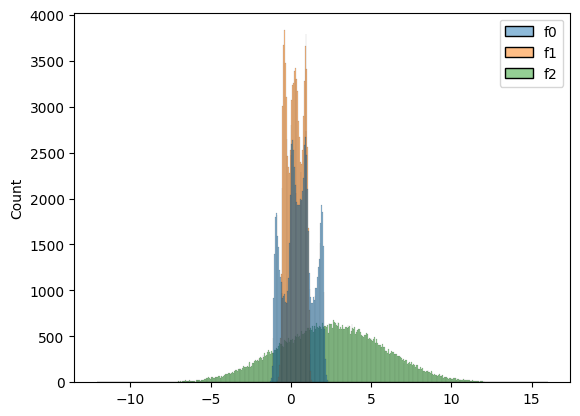

In [8]:
sns.histplot(data=data_0.drop(['id', 'product'], axis=1))

<Axes: ylabel='Count'>

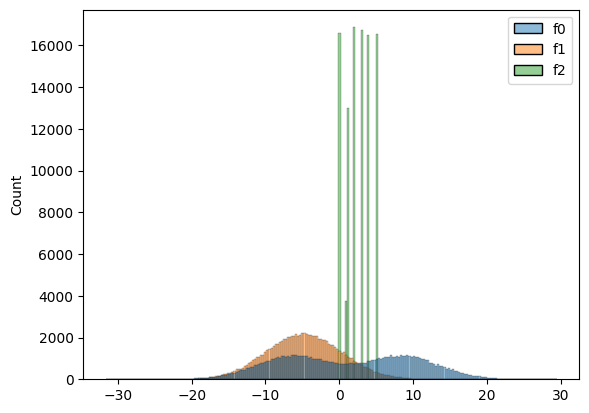

In [9]:
sns.histplot(data=data_1.drop(['id', 'product'], axis=1))

<Axes: ylabel='Count'>

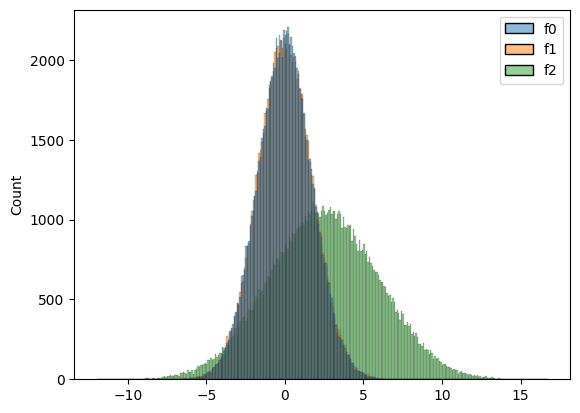

In [10]:
sns.histplot(data=data_2.drop(['id', 'product'], axis=1))

It seems that not all values in the same set follow the normal distribution, except for the features in `data_2`.

It is said that normalization should be used when the data do not follow normal distribution. However, two other things can be taken into consideration:
1. Normalization is highly affected by outliers, while standardization is only slightly affected by them.
1. Normalization is used when the algorithm does not make any assumptions about the data distribution. Standardization is used when the algorithm assumes a certain data distribution.

We can see that some of our data have outliers. We should also note that linear regression assumes that the data is normally distributed. Based on these pieces of information, we will use standardization to scale our data. 

Because each source (`data_0`, `data_1`, or `data_2`) has different data distributions and since we will create different models for each source, the sets from the same source will be scaled together.

### Standardization
We will scale the data by fitting the scaler models on the training sets and transforming both training and validation sets with it. The resulting sets will be reassigned to the original variable names to ensure that everything stays in place.

<Axes: ylabel='Count'>

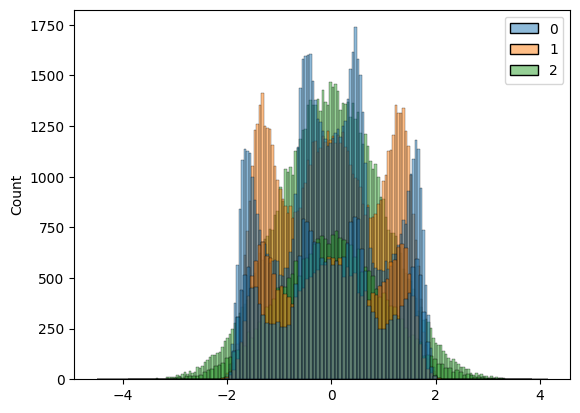

In [11]:
# data_0

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_0_features = standard_scaler.fit_transform(X=train_0_features.values)

## Transforming validation set
val_0_features = standard_scaler.transform(X=val_0_features.values)

## Checking transformed dataset
sns.histplot(data=train_0_features)
sns.histplot(data=val_0_features)

<Axes: ylabel='Count'>

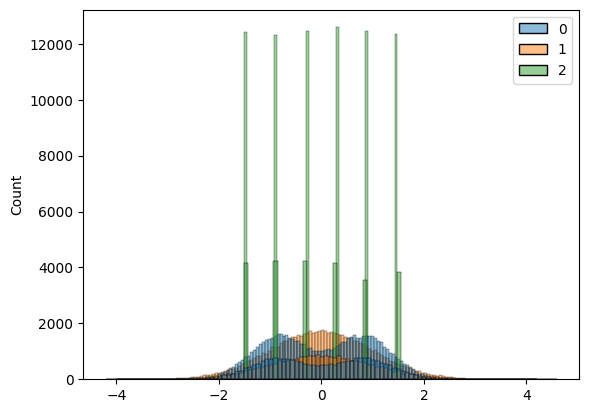

In [12]:
# data_1

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_1_features = standard_scaler.fit_transform(X=train_1_features.values)

## Transforming validation set
val_1_features = standard_scaler.transform(X=val_1_features.values)

## Checking transformed dataset
sns.histplot(data=train_1_features)
sns.histplot(data=val_1_features)

<Axes: ylabel='Count'>

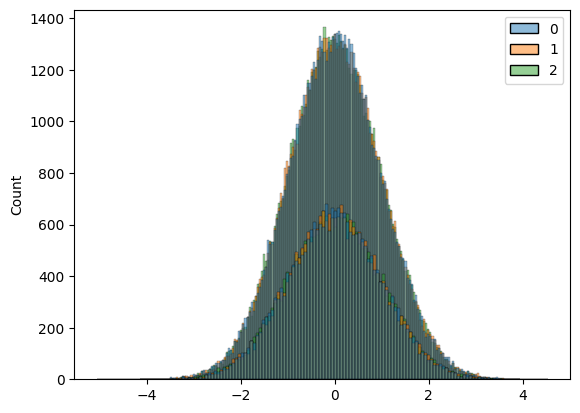

In [13]:
# data_2

## Creating an instance of the standard scaler
standard_scaler = StandardScaler()

## Fitting & transforming training set
### .values attribute excludes dataframe headers and prevent errors/warnings
train_2_features = standard_scaler.fit_transform(X=train_2_features.values)

## Transforming validation set
val_2_features = standard_scaler.transform(X=val_2_features.values)

## Checking transformed dataset
sns.histplot(data=train_2_features)
sns.histplot(data=val_2_features)

The histograms show that all data are now centered around the mean of `0`, indicating a successful standardization.

## Summary of data preprocessing
In this stage, we have done the following:
1. Splitting the source datasets into training and validation sets with a ratio of 75:25,
1. Separating features and target into separate datasets,
1. Standardizing the features.



# Predicting oil reserve volume

Now, we can train our models to predict how much oil does a region have. We will use linear regression models for this task. Because each of the regions have different features and reserves, each region's reserve volume will be predicted by its own model.

The prediction mean will show how much oil does a region have on average. To know whether or not our model made correct predictions, we will use the RMSE (root of mean squared error) metric. The closer it is to zero, the better.

In [14]:
# Creating a list of datasets
train_feature_list = [train_0_features, train_1_features, train_2_features]
train_target_list = [train_0_target, train_1_target, train_2_target]

val_feature_list = [val_0_features, val_1_features, val_2_features]
val_target_list = [val_0_target, val_1_target, val_2_target]

# Creating an empty list for storing prediction arrays
pred_list = []

# Creating an empty list for flattened arrays
flattened_pred_list = []

# Automating the model creation, training, and prediction processes
for i in range(0, 3):
    # Creates an instance of linear regression model
    model = LinearRegression()
    
    # Training with the training set
    model.fit(train_feature_list[i], train_target_list[i])
    
    # Getting predictions
    pred = model.predict(val_feature_list[i])
    
    # Storing the array in a list for later use
    pred_list.append(pred)
    
    # Flattening the list
    temp_list = []
    for sublist in pred_list[i]:
        for item in sublist:
            temp_list.append(item)
    flattened_pred_list.append(temp_list)
    
    # Getting average predicted reserve volume
    print(f'Average predicted reserve volume of region {i}:', pred.mean())
    
    # Getting metric score, exponentiating it by 0.5 to find the square root of MSE
    RMSE = (mean_squared_error(val_target_list[i], pred)) ** 0.5
    print(f'RMSE of model predictions in region {i}:', RMSE)
    
    print()

Average predicted reserve volume of region 0: 92.59256778438035
RMSE of model predictions in region 0: 37.5794217150813

Average predicted reserve volume of region 1: 68.728546895446
RMSE of model predictions in region 1: 0.893099286775617

Average predicted reserve volume of region 2: 94.96504596800489
RMSE of model predictions in region 2: 40.02970873393434



The results show that **region 2** has the **largest average supply volume (\~94,965 barrels)**. However, this comes at the cost of having the **highest RMSE score (\~40)** of all three regions. 

**Region 0** has a similar predicted average of **\~92,592 barrels** with a comparably **high potential of errors (\~37)**. 

**Region 1**, on the other hand, has much less predicted mean volume **(\~68,728 barrels)** but with **significantly lower RMSE** as well **(\~0.89)**.

# Preparing for revenue & profit calculation

We need to know how much reserve volume is considered profitable for each well.

Let's examine these figures again:
- OilyGiant has a budget of 100 million USD to build 200 wells.
- 1000 barrels of oil reserve volume returns 4500 USD.

We can calculate the minimum reserve volume needed for the investment to reach the break-even point by dividing the construction budget of 1 well with the revenue generated per volume unit.

In [15]:
budget = 100000000
cost_per_well = budget / 200
revenue_per_volume = 4500

min_volume = (cost_per_well / revenue_per_volume) * 1000

print(f'The minimum reserve volume needed to reach ROI: {min_volume} barrels')

The minimum reserve volume needed to reach ROI: 111111.11111111111 barrels


It turns out that each well has to produce a minimum of around 111 thousand barrels to only cover the its construction costs (without even making any profit). This is far higher than any of the region's mean predicted volume. Thus, in order for the new wells to be profitable, we need to pick only the drilling sites with oil supplies larger than 111 thousand barrels.

# Revenue calculation

From each region, we need to know which sites have the most reserve (and the highest potential for profit). Because the company has budgeted for the construction of 200 wells, we will pick 200 of the best drilling sites from each region and compare their potential revenues. This can be achieved by creating a function which filters our data, aggregates them, and calculates revenues based on the actual volume of reserves. Note that we will use the actual (as opposed to predicted) reserve volumes to prevent making false assumptions about the sites' profitability.

In [16]:
# Defining the function
def calculate_revenue(predictions, target, n_wells, revenue_per_volume):
    """
    Calculates the potential revenue of each region
    by taking the sites with the highest predicted volumes,
    retrieving the corresponding actual volumes,
    getting the total volume of the sites,
    and multiplying it with the revenue per volume.
    
    Parameters:
    predictions: array or list containing predicted volumes of sites in a region.
    target: dataframe containing actual volumes of sites in a region.
    n_wells: integer, number of sites to pick/wells to construct.
    revenue_per_volume: numeric, revenue yielded per volume unit
    
    Returns a number: total revenue subtracted by constsruction costs.
    """ 
    # Converts predictions into a series to allow for indexing
    pred_series = pd.Series(predictions)
    
    # Resetting target indices to match with the predictions'
    target = target.reset_index()
    
    # Sorting the prediction values in descending order 
    # and getting the top `n_wells` indices
    indices = pred_series.sort_values(ascending=False).index
    
    # Getting the sum of target values with the corresponding indices
    sliced_target = target.loc[indices]
    total_volume = sliced_target.loc[:n_wells, 'product'].sum()
    
    # Returns the profit deduced by construction costs
    return ((total_volume * revenue_per_volume) - (cost_per_well * n_wells))

In [17]:
# Applying the function to the datasets
## data_0
revenue_0 = calculate_revenue(predictions=flattened_pred_list[0],
                                target=val_0_target,
                                n_wells=200,
                                revenue_per_volume=4500)

print(f'Potential revenue for region 0: ${revenue_0}')

## data_1
revenue_1 = calculate_revenue(predictions=flattened_pred_list[1],
                                target=val_1_target,
                                n_wells=200,
                                revenue_per_volume=4500)

print(f'Potential revenue for region 1: ${revenue_1}')

## data_0
revenue_2 = calculate_revenue(predictions=flattened_pred_list[2],
                                target=val_2_target,
                                n_wells=200,
                                revenue_per_volume=4500)

print(f'Potential revenue for region 2: ${revenue_2}')

Potential revenue for region 0: $65577486.26789647
Potential revenue for region 1: $1688385152.6786623
Potential revenue for region 2: $9573656738.472118


Based on the potential revenues, the order of regions' profitability is different than the average predicted reserve results: region 2 has the highest potential, followed by region 1 with only 17% of the potential. Region 0 ranks last with even lower (approx. 3% of region 1's) potential revenue.

However, these calculations have not taken into account the risks involved. We will analyze the risks of each region in the next section.

# Risk and profit calculation

Every site has a possibility to produce less than the required amount for ROI. Therefore, construction in each region comes with two possibilities: risk of loss and potential for profit.

To assess these two possibilities, we need to conduct a study of 500 sites within a region and choose the 200 most profitable sites. However, doing one test on a sample of only 500 sites will not be enough to provide an accurate prediction, and testing all 25,000 sites in the dataset will increase operating costs. We can tackle this problem by **bootstrapping** the data: repeating the test on random samples enough times to get a statistic closer to the true parameter. Repeating this process 1000 times should be enough for our purposes.

In [34]:
# state = np.random.RandomState(12345)
# target = val_0_target.reset_index(drop=True)
# target_sample = target.sample(n=500, replace=True, random_state=state)
# indices = target_sample.index
# indices

# predictions = flattened_pred_list[0]
# predictions = pd.Series(predictions)
# predictions_sample = predictions[indices]
# predictions_sample = predictions_sample.sort_values(ascending=False)[:200]
# indices = predictions_sample.index

# target_sample = target_sample.loc[indices, 'product']
# total_volume = target_sample.sum()
# total_volume

24419.312949490577

In [39]:
def bootstrapped_revenue(predictions, target, n_tests, sample_size, n_wells, revenue_per_volume):
    """
    Repeating the process `n_tests` times,
    takes samples of size `sample_size`
    and calculates sample revenues.

    Parameters:
    predictions: array or list containing predicted volumes of sites in a region.
    target: dataframe containing actual volumes of sites in a region.
    n_tests: integer, how many times should the process be repeated
    sample_size: integer, how many data should be taken in a sample
    n_wells: integer, number of sites to pick/wells to construct.
    revenue_per_volume: numeric, revenue yielded per volume unit
    
    Returns a list (of length `n_tests`) of calculated sample revenues.
    """
    # Setting a random state for sampling
    state = np.random.RandomState(12345)
    # Creating an empty list to store results
    values = []
    # Resetting target indices to match with the `predictions` array
    target = target.reset_index(drop=True)
    
    # Bootstrapping
    # Repeating the process `n_tests` times
    for i in range(n_tests):
        # Creates a target sample of size `sample_size`
        # `replace=True` allows for taking the same data twice
        # random_state of value `state` ensures consistent results
        target_sample = target.sample(n=sample_size, replace=True, random_state=state)
        
        # Getting `target_sample` indices to get the corresponding `predictions` values
        indices = target_sample.index
        
        # Getting the corresponding `predictions` values
        predictions = pd.Series(predictions)
        predictions_sample = predictions[indices]
        
        # Sorting to get the top `n_wells` predicted volumes
        predictions_sample = predictions_sample.sort_values(ascending=False)[:n_wells]
        
        # Getting the prediction indices to get the actual corresponding volumes
        indices = predictions_sample.index
        
        # Getting the actual corresponding volumes in `target_sample` and adding them
        target_sample = target_sample.loc[indices, 'product']
        total_volume = target_sample.sum()
        
        # Calculating loss or revenue deducted by construction costs
        LOR = ((total_volume * revenue_per_volume) - (cost_per_well * n_wells))
        
        # Appending LOR to the list
        values.append(LOR)
        
    # Returns the LOR values as a series    
    return pd.Series(values)

In [40]:
# Applying the function to the datasets
## data_0
bootstrapped_revenue_0 = bootstrapped_revenue(predictions=flattened_pred_list[0], 
                                              target=val_0_target, 
                                              n_tests=1000, 
                                              sample_size=500, 
                                              n_wells=200, 
                                              revenue_per_volume=4500)

## data_1
bootstrapped_revenue_1 = bootstrapped_revenue(predictions=flattened_pred_list[1], 
                                              target=val_1_target, 
                                              n_tests=1000, 
                                              sample_size=500, 
                                              n_wells=200, 
                                              revenue_per_volume=4500)

## data_2
bootstrapped_revenue_2 = bootstrapped_revenue(predictions=flattened_pred_list[2], 
                                              target=val_2_target, 
                                              n_tests=1000, 
                                              sample_size=500, 
                                              n_wells=200, 
                                              revenue_per_volume=4500)

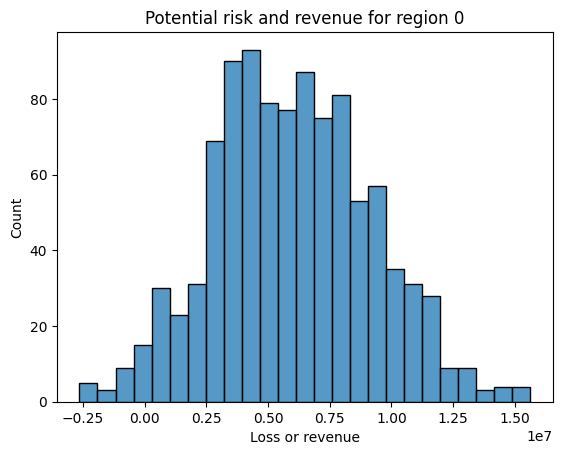

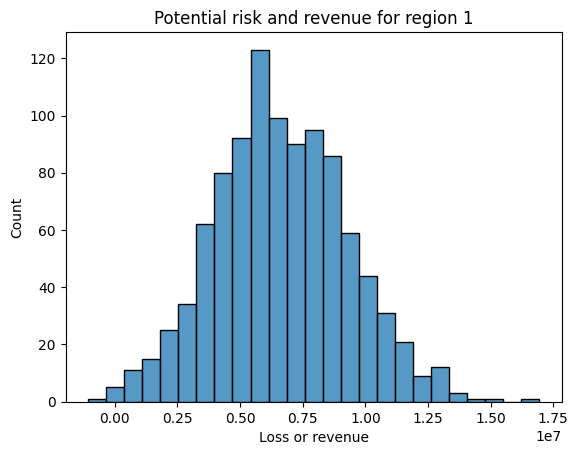

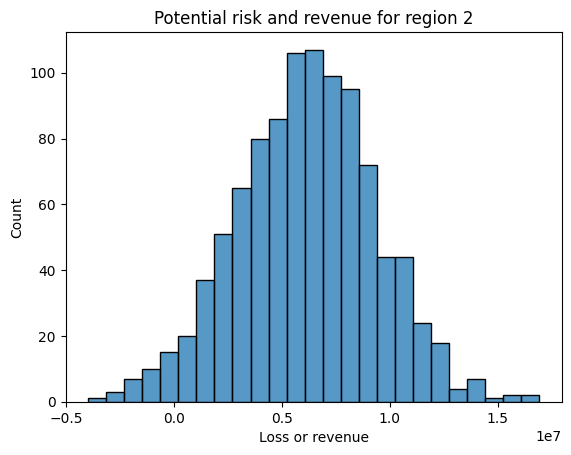

In [41]:
# Visualizing the potential revenues distribution
region_revenues = [bootstrapped_revenue_0, bootstrapped_revenue_1, bootstrapped_revenue_2]
plot_titles = ['Potential risk and revenue for region 0', 
               'Potential risk and revenue for region 1',
               'Potential risk and revenue for region 2']

for i in range(len(region_revenues)):
    sns.histplot(region_revenues[i], bins=25)
    plt.title(plot_titles[i])
    plt.xlabel('Loss or revenue')
    plt.show()

The above histograms show that every region is generally profitable, albeit with some risk of loss. In the next section, we will conduct statistical tests to make sure which region has the highest chance of returning profit instead of loss.

# Calculating confidence intervals

All of the regions have some risk of loss. The company requires us to pick only the regions with less than 2.5% risk of loss and the highest average profit. 

To calculate this risk, we will use confidence intervals. Confidence intervals of sample statistics measure the probability of getting the actual population parameter within the specified range/interval.

We want to have a 95% possibility of the actual profit mean being in the range, so we will set our confidence interval to 95%. 

In [44]:
# Region 0
## Getting the upper and lower bounds of profit values: 2.5% each from the lowest and highest values
confidence_interval = [bootstrapped_revenue_0.quantile(0.025), bootstrapped_revenue_0.quantile(0.975)]

## Getting the risk of loss: number of possible losses over number of all values
risk_of_loss = len(bootstrapped_revenue_0[bootstrapped_revenue_0 < 0]) / len(bootstrapped_revenue_0)

## Getting the mean profit of the region
mean_profit = bootstrapped_revenue_0.mean()

## Printing values
print('Region 0')
print('95% confidence interval bounds:', confidence_interval)
print('Risk of loss:', (risk_of_loss * 100), '%')
print('Mean profit:', mean_profit)
print()


# Region 1
## Getting the upper and lower bounds of profit values: 2.5% each from the lowest and highest values
confidence_interval = [bootstrapped_revenue_1.quantile(0.025), bootstrapped_revenue_1.quantile(0.975)]

## Getting the risk of loss: number of possible losses over number of all values
risk_of_loss = len(bootstrapped_revenue_0[bootstrapped_revenue_1 < 0]) / len(bootstrapped_revenue_1)

## Getting the mean profit of the region
mean_profit = bootstrapped_revenue_1.mean()

## Printing values
print('Region 1')
print('95% confidence interval bounds:', confidence_interval)
print('Risk of loss:', (risk_of_loss * 100), '%')
print('Mean profit:', mean_profit)
print()


# Region 2
## Getting the upper and lower bounds of profit values: 2.5% each from the lowest and highest values
confidence_interval = [bootstrapped_revenue_2.quantile(0.025), bootstrapped_revenue_2.quantile(0.975)]

## Getting the risk of loss: number of possible losses over number of all values
risk_of_loss = len(bootstrapped_revenue_2[bootstrapped_revenue_2 < 0]) / len(bootstrapped_revenue_2)

## Getting the mean profit of the region
mean_profit = bootstrapped_revenue_2.mean()

## Printing values
print('Region 2')
print('95% confidence interval bounds:', confidence_interval)
print('Risk of loss:', (risk_of_loss * 100), '%')
print('Mean profit:', mean_profit)

Region 0
95% confidence interval bounds: [129483.3113511391, 12311636.057914983]
Risk of loss: 2.0 %
Mean profit: 6007352.442611653

Region 1
95% confidence interval bounds: [1579884.8131991457, 11976415.874631526]
Risk of loss: 0.3 %
Mean profit: 6652410.582210722

Region 2
95% confidence interval bounds: [-122184.952372932, 12306444.73941316]
Risk of loss: 3.0 %
Mean profit: 6155597.228409678


Of all 3 regions we tested, region 1 has the best statistics: having both the **lowest risk of loss (\~ 0.3%)** and the **highest mean profit (\~6.65 million USD)**. Based on these calculations, OilyGiant has the best chance of making profit by constructing wells at the **best 200 sites in region 1.**

# Conclusion

We were provided with 3 sets containing the features and oil production in 3 regions. Each set had the data of 10,000 potential drilling sites.

In preprocessing, we 
1. split the source datasets into 2 each: training and validation sets with a ratio of 75:25,
1. separated features and target into their own sets,
1. scaled the features by standardization.

We used linear regression models to predict average oil reserve volume of each region. Region 1 had the lowest predicted mean volume **(\~68,728 barrels)** but with **the lowest prediction error** as well **(\~0.89)**.

The next calculations showed that, in order to cover the costs of building 200 oil wells (100 million USD), we need the regions to **produce at least 111,111 barrels of oil**, given that the company gets a revenue of 4,500 USD per 1000 barrels.

None of the regions had predicted mean reserve volumes that fulfill this criterion, so we made a suggestion for the company to only construct wells on 200 sites with the highest predicted reserve volume. 

We calculated the potential revenues of each site if the company were to construct 200 wells on the best sites. Region 1 had the second-to-highest potential of **168 million USD**. However, this calculation had not yet considered the risks involved.

To measure the risk of drilling at unprofitable sites and incurring losses, we repeated (for 1000 times) an experiment on 500 sample sites (from the validation set) and picked 200 sites with the best predicted volume. This experiment returned data which, theoretically, should reflect the possibility of having the actual profit value within it.

In the end, we found out that **region 1**: 
- was **95% likely** to return profit between **\~1.5--11.9 million USD**,
- had the **highest mean sample profit of \~6.65 million USD**,
- had the **lowest risk of loss** at **\~0.3%**.

Based on these findings, we decided that OilyGiant has the best chance of making profit by constructing wells at the **best 200 sites in region 1.**